# Post One
This is the notebook for the first post!  
in it we'll:
- Make pretty bar graphs! Four of them, to be exact!
 -  1) A graph that shows the percentage of the total pop
  - 2) & 3) Each race vs it respective pay group
  - 4) Plots 2 & 3 on one graph. (may not use!)

## Importing

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker

In [3]:
%matplotlib inline

In [4]:
%config IPCompleter.greedy=True

In [23]:
init_notebook_mode(connected=True)

In [24]:
cf.go_offline()

## Bring on the Data

In [6]:
pwd

'C:\\Users\\Hakuj\\Documents\\DnD Project'

In [7]:
dndf = pd.read_csv('DnDBeyond.csv').rename(columns={'RACE': 'Race', 'n_characters': 'Count'})

## Filtering
I realize that some of these could be done in a single line but I'm breaking them up for readability.

In [8]:
free = [i.title() for i in ['AARAKOCRA', 'CHANGELING', 'DRAGONBORN', 'DWARF', 'ELF', 'GENASI',
                            'GNOME', 'GOLIATH', 'HALF-ELF', 'HALF-ORC', 'HALFLING', 'HUMAN',
                            'KALASHTAR', 'SHIFTER', 'TIEFLING', 'AASIMAR', 'WARFORGED']]

In [9]:
free

['Aarakocra',
 'Changeling',
 'Dragonborn',
 'Dwarf',
 'Elf',
 'Genasi',
 'Gnome',
 'Goliath',
 'Half-Elf',
 'Half-Orc',
 'Halfling',
 'Human',
 'Kalashtar',
 'Shifter',
 'Tiefling',
 'Aasimar',
 'Warforged']

In [68]:
all_races = dndf.groupby('Race').sum().sort_values(by='Count')

In [69]:
free_races = dndf[dndf['Race'].isin(free)].groupby('Race').sum().sort_values(by='Count')

In [70]:
prem_races = dndf[~dndf['Race'].isin(free)].groupby('Race').sum().sort_values(by='Count')

In [71]:
total_count = all_races.sum()[0]

In [72]:
total_free = free_races.sum()[0]

In [73]:
total_prem = prem_races.sum()[0]

In [74]:
all_races['Percentage'] = [((i / total_count) * 100).round(2) for i in all_races['Count']]

In [75]:
free_races['Percentage'] = [((i / total_free) * 100).round(2) for i in free_races['Count']]

In [76]:
prem_races['Percentage'] = [((i / total_prem) * 100).round(2) for i in prem_races['Count']]

In [77]:
all_races = all_races.reset_index()

In [78]:
free_races = free_races.reset_index()

In [79]:
prem_races = prem_races.reset_index()

## Chart Making!

### Rough Draft

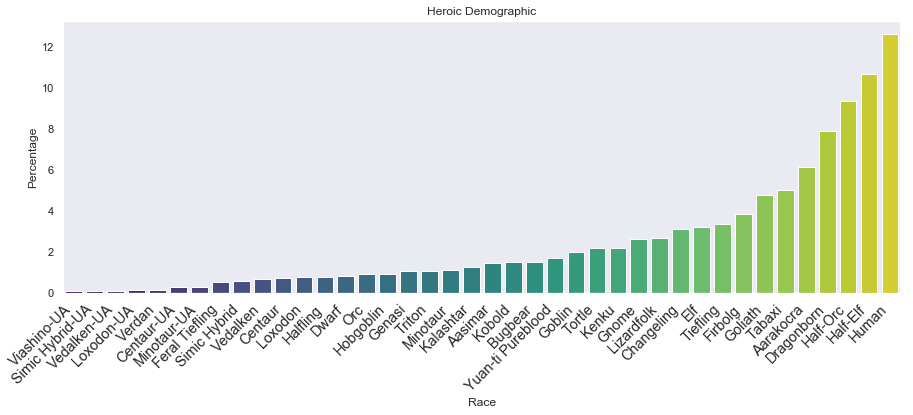

In [125]:
sns.set(style="dark")
fig, ax = plt.subplots(figsize=(15,5))
plt.title('Heroic Demographic')
plt.xticks(rotation=45,
           horizontalalignment='right',
           fontsize='large'
          )
sns.barplot(data=all_races, x='Race', y='Percentage', palette="viridis");
